# p.138 연습
대출자들의 채무 상환과 관련된 데이터를 활용하여 상환 여부를 예측하기 위한 그래디언트 부스팅 분석을 실시하고 결과를 해석하시오.
* 목표변수 : BAD(범주형)
* 데이터 비율 train : test = 0.7 : 0.3
* random_state = 1234

# Step 0. 패키지 불러오기

In [32]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# 데이터 분리
from sklearn.model_selection import train_test_split
# Scaler
from sklearn.preprocessing import StandardScaler
# SupportVectorMachine
from sklearn.svm import SVC
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# 평가함수
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

# Step 1. 데이터 구성하기

### 데이터 불러오기

In [20]:
df_raw = pd.read_csv('D:/Study/PoscoAcademy/2_bigdata/raw_data/HMEQ.csv', encoding = 'euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


### 결측치 처리

In [21]:
# 결측치 확인
df_raw.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [22]:
# JOB 변수 결측치 Other 대체
df_raw['JOB'].fillna('Other', inplace = True)
# 숫자형 변수 결측치 평균 대체
df_raw.fillna(df_raw.mean(), inplace = True)

### 더미변수 생성

In [23]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


### 데이터 분리

In [24]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']
# 데이터 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print('train data X size :', df_train_x.shape)
print('train data Y size :', df_train_y.shape)
print('test data X size :', df_test_x.shape)
print('test data Y size :', df_test_y.shape)

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


# Step 2. 서포트 벡터 머신 모델 생성

### 기본 옵션으로 모델 생성

In [25]:
# 기본 모델
svm_basic = SVC(random_state = 1234)
svm_basic.fit(df_train_x, df_train_y)
# train/test 데이터 설명력
print('Score in train set :', svm_basic.score(df_train_x, df_train_y).round(4))
print('Score in test set :', svm_basic.score(df_test_x, df_test_y).round(4))

Score in train set : 0.9081
Score in test set : 0.9076


### Hyprt Parameter

##### C : 규제에 대한 강도

In [26]:
# train/test 설명력 저장
train_accuracy = []
test_accuracy = []

# c
para_c = [10 ** c for c in range(-2,2)]

for v_C in para_c :
    svm = SVC(random_state = 1234,
              C = v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

# 모델 설명력 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.909,0.908


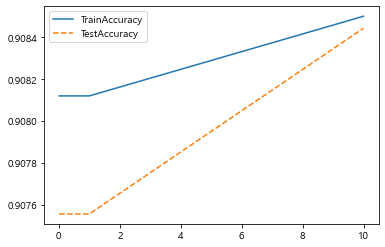

In [27]:
# 모델 설명력 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'TestAccuracy')
plt.legend()

##### Gamma : 훈련 샘플이 미치는 영향의 범위

In [29]:
# train/test 설명력 저장
train_accuracy = []
test_accuracy = []

# gamma
para_gamma = [10 ** gamma for gamma in range(-2,2)]

for v_gamma in para_gamma :
    svm = SVC(random_state = 1234,
              C = 0.1,
              gamma = v_gamma)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['Gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

# 모델 설명력 확인
df_accuracy_gamma.round(4)

,Gamma,TrainAccuracy,TestAccuracy
0,0.01,0.9081,0.9076
1,0.10,0.9081,0.9076
2,1.00,0.9081,0.9076
3,10.00,0.9081,0.9076


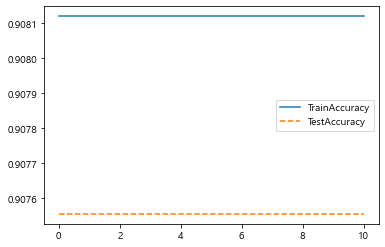

In [30]:
# 모델 설명력 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'TestAccuracy')
plt.legend()

### Scale 변환

In [33]:
# 변수명 저장
v_feature_name = df_train_x.columns
# StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [34]:
# 데이터 분리
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print('train data X size :', df_train_x.shape)
print('test data X size :', df_test_x.shape)

train data X size : (2623, 18)
test data X size : (1125, 18)


### Scaler 적용 후 기본 옵션으로 모델 생성

In [35]:
# 기본 모델
svm_basic = SVC(random_state = 1234)
svm_basic.fit(df_scaled_train_x, df_train_y)
# train/test 데이터 설명력
print('Score in train set :', svm_basic.score(df_scaled_train_x, df_train_y).round(4))
print('Score in test set :', svm_basic.score(df_scaled_test_x, df_test_y).round(4))

Score in train set : 0.9436
Score in test set : 0.9351


### Scaler 적용 후 Hyper Parameter

##### C : 규제에 대한 강도

In [36]:
# train/test 설명력 저장
train_accuracy = []
test_accuracy = []

# c
para_c = [10 ** c for c in range(-2,2)]

for v_C in para_c :
    svm = SVC(random_state = 1234,
              C = v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

# 모델 설명력 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.944,0.935
3,10.00,0.979,0.949


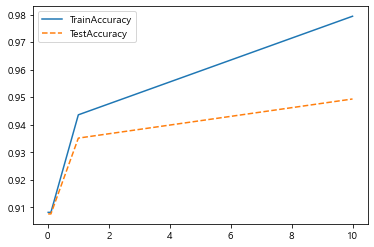

In [37]:
# 모델 설명력 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'TestAccuracy')
plt.legend()

##### gamma : 훈련 샘플이 미치는 영향의 범위

In [40]:
# train/test 설명력 저장
train_accuracy = []
test_accuracy = []

# gamma
para_gamma = [10 ** gamma for gamma in range(-2,2)]

for v_gamma in para_gamma :
    svm = SVC(random_state = 1234,
              C = 1,
              gamma = v_gamma)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['Gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

# 모델 설명력 확인
df_accuracy_gamma.round(4)

,Gamma,TrainAccuracy,TestAccuracy
0,0.01,0.9230,0.9200
1,0.10,0.9596,0.9422
2,1.00,0.9962,0.9200
3,10.00,1.0000,0.9084


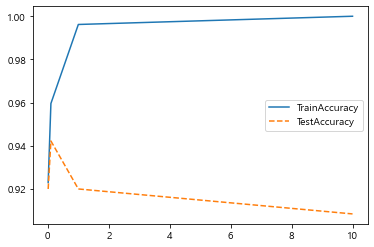

In [41]:
# 모델 설명력 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'TestAccuracy')
plt.legend()

##### GridSearchCV

In [45]:
estimator = SVC(random_state = 1234)
# parameter
para_grid = {'C' : para_c,
             'gamma' : para_gamma}
# 설명력이 높은 최적 parameter 찾기
grid_svm = GridSearchCV(estimator,
                        para_grid,
                        scoring = 'accuracy',
                        n_jobs = -1)
grid_svm.fit(df_scaled_train_x, df_train_y)
# 결과 확인
print('best estimator model: \n{}'.format(grid_svm.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_svm.best_params_))
print('\nbest score: \n{}'.format(grid_svm.best_score_.round(4)))

best estimator model: 
SVC(C=10, gamma=0.1, random_state=1234)

best parameter: 
{'C': 10, 'gamma': 0.1}

best score: 
0.9596


# Step 3. 최종 모델 선정

### 최종 모델 생성

In [42]:
# 최종 모델
svm_final = SVC(random_state = 1234,
                C = 1,
                gamma = 0.1)
svm_final.fit(df_scaled_train_x, df_train_y)
# train/test 데이터 설명력
print('Score in train set :', svm_final.score(df_scaled_train_x, df_train_y).round(4))
print('Score in test set :', svm_final.score(df_scaled_test_x, df_test_y).round(4))

Score in train set : 0.9596
Score in test set : 0.9422


### 최종 모델 평가

In [44]:
# 평가
y_pred = svm_final.predict(df_scaled_test_x)
print('Accuracy : {0:.3f}\n'.format(svm_final.score(df_scaled_test_x,df_test_y)))
print('Confusion matrix :\n{}'.format(confusion_matrix(df_test_y, y_pred)))
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy : 0.942

Confusion matrix :
[[1021    0]
 [  65   39]]
              precision    recall  f1-score   support

           0      0.940     1.000     0.969      1021
           1      1.000     0.375     0.545       104

    accuracy                          0.942      1125
   macro avg      0.970     0.688     0.757      1125
weighted avg      0.946     0.942     0.930      1125

